In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

In [3]:
kuusamo_url = 'https://raw.githubusercontent.com/Mini-project-Team-Theta/team_theta/refs/heads/main/final/kuusamo_df.csv'
df = pd.read_csv(kuusamo_url)
df.head()

,Observation station,Year,Month,Day,Date,Snow depth mean [cm],Average temperature [°C],cloud_code,Global radiation mean [W/m2]
0,Kuusamo Kiutak?ng?s,2004,1,1,2004-01-01,32.0,-28.6,NaN,0.2
1,Kuusamo Kiutak?ng?s,2004,1,2,2004-01-02,32.1,-20.6,NaN,-0.2
2,Kuusamo Kiutak?ng?s,2004,1,3,2004-01-03,31.0,-21.9,NaN,0.3
3,Kuusamo Kiutak?ng?s,2004,1,4,2004-01-04,30.7,-14.7,NaN,-0.4
4,Kuusamo Kiutak?ng?s,2004,1,5,2004-01-05,31.8,-14.2,NaN,-1.0


In [4]:
df["Date"] = pd.to_datetime(df["Date"])
df['day_of_year'] = df['Date'].dt.dayofyear
df.drop(columns=["Observation station"], inplace=True)

In [5]:
df["Average temperature [°C]"] = df["Average temperature [°C]"].interpolate()
df["Global radiation mean [W/m2]"] = df["Global radiation mean [W/m2]"].interpolate()
df.loc[df['cloud_code'].isnull(),'cloud_code'] = 9
df.loc[df['Snow depth mean [cm]'].isnull(),'Snow depth mean [cm]'] = 0

In [6]:
X = df[["Average temperature [°C]", "Global radiation mean [W/m2]", "day_of_year", "cloud_code"]]
y = df["Snow depth mean [cm]"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = model.predict(X_test)

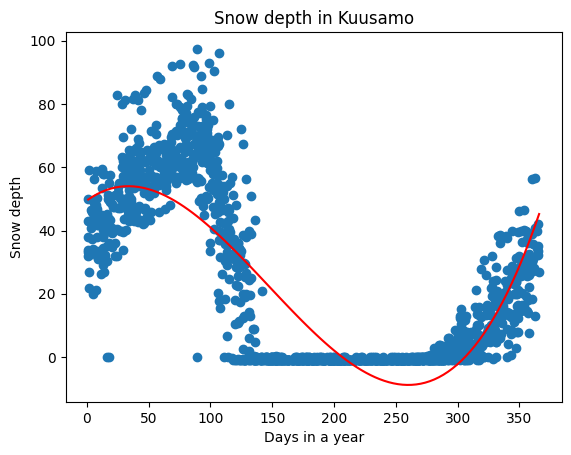

In [15]:
mymodel = np.poly1d(np.polyfit(X_train["day_of_year"], y_train, 3))

myline = np.linspace(1, 366, 100)


plt.scatter(X_test["day_of_year"], y_test)
plt.plot(myline, mymodel(myline), color='red')
plt.xlabel("Days in a year")
plt.ylabel("Snow depth")
plt.title("Snow depth in Kuusamo")
plt.show()

In [11]:
snowdept = mymodel(2)
print(snowdept)

50.0501781656627


In [12]:
corr_matrix = df.corr()

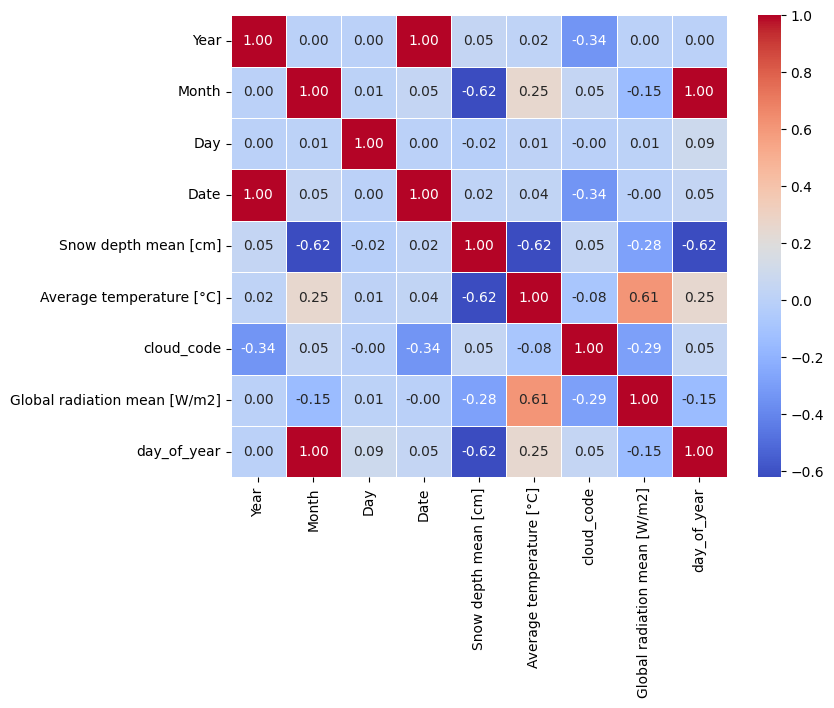

In [13]:
plt.figure(figsize=(8,6)) 
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)


plt.show()